# Machine Learning 
## K-Neighbourhood Regression

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [7]:
X,y= load_boston(return_X_y=True)

c:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [8]:
pipe= Pipeline([
    ('scaling', StandardScaler()),
    ('algo', KNeighborsRegressor())
])

In [10]:
pipe.get_params()

{'memory': None,
 'steps': [('scaling', StandardScaler()), ('algo', KNeighborsRegressor())],
 'verbose': False,
 'scaling': StandardScaler(),
 'algo': KNeighborsRegressor(),
 'scaling__copy': True,
 'scaling__with_mean': True,
 'scaling__with_std': True,
 'algo__algorithm': 'auto',
 'algo__leaf_size': 30,
 'algo__metric': 'minkowski',
 'algo__metric_params': None,
 'algo__n_jobs': None,
 'algo__n_neighbors': 5,
 'algo__p': 2,
 'algo__weights': 'uniform'}

In [11]:
model= GridSearchCV(
    estimator= pipe,
    param_grid= {'algo__n_neighbors':[1,2,3,4,5,6,7,8,9,10]},
    cv=5
)

In [12]:
model.fit(X,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('algo', KNeighborsRegressor())]),
             param_grid={'algo__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [13]:
model.cv_results_

{'mean_fit_time': array([0.00558524, 0.00598383, 0.00738063, 0.0025929 , 0.0031929 ,
        0.00219316, 0.00179529, 0.00299282, 0.00299349, 0.00259466]),
 'std_fit_time': array([0.00569804, 0.00649407, 0.00635951, 0.00101674, 0.00074687,
        0.00074682, 0.00074604, 0.00063098, 0.00089138, 0.00101837]),
 'mean_score_time': array([0.00319028, 0.00359159, 0.00339017, 0.00279264, 0.00299177,
        0.00239382, 0.00239315, 0.00319018, 0.00219297, 0.00319009]),
 'std_score_time': array([0.00159609, 0.00079736, 0.00079877, 0.00171607, 0.00089155,
        0.00101727, 0.00079792, 0.00074581, 0.00097889, 0.00074673]),
 'param_algo__n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'algo__n_neighbors': 1},
  {'algo__n_neighbors': 2},
  {'algo__n_neighbors': 3},
  {'algo__n_neighbors': 4},
  {'algo__n_ne

In [15]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005585,0.005698,0.003190,0.001596,1,{'algo__n_neighbors': 1},0.339313,0.423779,0.534566,0.486373,-1.623928,0.032020,0.830549,10
1,0.005984,0.006494,0.003592,0.000797,2,{'algo__n_neighbors': 2},0.441649,0.547962,0.474980,0.496794,-0.548699,0.282537,0.417052,9
2,0.007381,0.006360,0.003390,0.000799,3,{'algo__n_neighbors': 3},0.520304,0.593339,0.547746,0.513891,0.002980,0.435652,0.218139,8
3,0.002593,0.001017,0.002793,0.001716,4,{'algo__n_neighbors': 4},0.547088,0.606925,0.509770,0.490452,0.211278,0.473103,0.136807,7
4,0.003193,0.000747,0.002992,0.000892,5,{'algo__n_neighbors': 5},0.560895,0.619174,0.486619,0.469869,0.231330,0.473577,0.132431,6
5,0.002193,0.000747,0.002394,0.001017,6,{'algo__n_neighbors': 6},0.582450,0.621194,0.509111,0.446859,0.250417,0.482006,0.130434,5
6,0.001795,0.000746,0.002393,0.000798,7,{'algo__n_neighbors': 7},0.602434,0.636185,0.516102,0.442088,0.245749,0.488512,0.139022,4
7,0.002993,0.000631,0.003190,0.000746,8,{'algo__n_neighbors': 8},0.615090,0.631185,0.551340,0.440117,0.239072,0.495361,0.144674,3
8,0.002993,0.000891,0.002193,0.000979,9,{'algo__n_neighbors': 9},0.625314,0.630621,0.564464,0.429107,0.279376,0.505776,0.134503,1
9,0.002595,0.001018,0.003190,0.000747,10,{'algo__n_neighbors': 10},0.614446,0.652489,0.555555,0.420648,0.261128,0.500853,0.143381,2


## K-Neighbors Classification
```python
# Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline

# Pipeline
pipe= Pipeline([
    ('scale': StandardScaler()),
    ('model': KNeighborsClassifier())
])


# Model with Plot
def plot_output(scaler):
    pipe= Pipeline([
        ('scale': StandardScaler()),
        ('model': KNeighborsClassifier)
    ])
    
    pred= pipe.fit(X, y).predict(X)
    
    plt.figure(figsize= (9,3))
    plt.subplot(131)
    plt.scatter(x['x'], x['y'], c= y)
    plt.title("Original Data")
    
    plt.subplot(132)
    x_tfm= scaler.transform(X)
    plt.scatter(x_tfm[, 0], x_tfm[:, 1], c= y)
    plt.title("Transform Data")
    
    plt.subplot(133)
    X_new= np.concatenate([
        np.random.uniform(0, x['x'].max(), (5000, 1)),
        np.random.uniform(0, x['y'].max(), (5000, 1)),
    ], axis= 1)
    y_proba= pipe.predict_proba(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], alpha= 0.7)
    plt.title("Predicted Data")

plot_output(scaler)
```

## Logistis Regression
```python
# Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline
# Pipeline
pipe= Pipeline([
        ('scale': PolynomialFeatures()),
        ('model': LogisticRegression())
])

pipe.fit(X, y)
pipe.predict(X)
````

## Linear Regression

In [1]:
# Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df= sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
# 1. Preprocessing
X= df[['sepal_length']]
y= df[['sepal_width']]

In [10]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.20, random_state= 0)

In [11]:
print("Shape of X train :", X_train.shape, '\n',
      "Shape of X test :", X_test.shape, '\n',
      "Shape of y train :", y_train.shape, '\n',
      "Shape of y test :", y_test.shape)

Shape of X train : (120, 1) 
 Shape of X test : (30, 1) 
 Shape of y train : (120, 1) 
 Shape of y test : (30, 1)


In [12]:
model= LinearRegression()
model

LinearRegression()

In [16]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [13]:
model.fit(X_train, y_train)

LinearRegression()

In [14]:
predict= model.predict(X_test)
predict

array([[3.05581972],
       [3.04966784],
       [3.06504753],
       [3.00968066],
       [3.08042721],
       [3.04044003],
       [3.08042721],
       [3.02813628],
       [3.02506035],
       [3.0465919 ],
       [3.0465919 ],
       [3.03736409],
       [3.0465919 ],
       [3.03428816],
       [3.0465919 ],
       [3.08350315],
       [3.04966784],
       [3.06504753],
       [3.08657909],
       [3.06812346],
       [3.06197159],
       [3.06197159],
       [3.08657909],
       [3.09888283],
       [3.04351597],
       [3.09273096],
       [3.07735127],
       [3.04351597],
       [3.08042721],
       [3.08042721]])

In [17]:
model.score(X_test, y_test)

0.03280247260467428

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test, predict)

0.03280247260467428

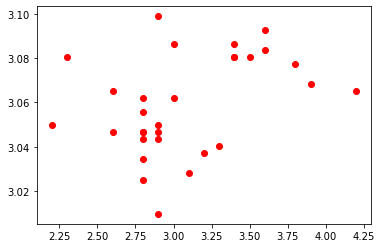

In [20]:
plt.scatter(y_test, predict, color= 'red')
plt.show()

In [28]:
# import libraries
import  streamlit as st
import plotly.express as px
import pandas as pd

# Load the data set
st.title("Plotly with Streamlit")
df= px.data.gapminder()
st.write(df)

st.write(df.columns)

# Summary
st.write(df.describe())

# Data Management
year_option= df['year'].unique().tolist()

year= st.selectbox("Which year should we want to plot? ", year_option, 0)

# Plotting
fig= px.scatter(df, x= 'gdpPercap', y= 'lifeExp', size= 'pop', color= 'continent',
                hover_name= 'continent', log_x=True, size_max=55,
                range_x=[100, 100000], range_y=[20, 90],
                animation_frame= 'year', animation_group= 'country')
fig

In [ ]:
import streamlit as st
from PIL import Image

st.write("""
Application for Media Files
""")

# Add image
st.write("""
## image
""")
image1= Image.open("snowleopard.jpg")
st.image(image1)

# Add video
st.write("""
## Video
""")

video1= open("leo.mp4", "rb") 
st.video(video1)

# Add Audio
st.write("""
## Audio
""")

audio1= open("leo.mp3", "rb") 
st.audio(audio1)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
from explainerdashboard.datasets import titanic_survive, feature_descriptions

X_train, y_train, X_test, y_test= titanic_survive()

model= RandomForestClassifier().fit(X_train, y_train)

explainer= ClassifierExplainer(model, X_test, y_test,
                               cats= ['Sex', 'Deck', 'Embarked'],
                               descriptions= feature_descriptions,
                               labels= ['Not survived', 'Survived'])

ExplainerDashboard(explainer).run()

Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating shap interaction values... (this may take a while)
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will s

2023-01-19 21:58:48.847 Dash is running on http://0.0.0.0:8050/



 * Serving Flask app "explainerdashboard.dashboards" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


2023-01-19 21:58:48.887  * Running on all addresses.
2023-01-19 21:58:48.890  * Running on http://10.11.0.227:8050/ (Press CTRL+C to quit)
2023-01-19 21:59:58.835 10.11.0.227 - - [19/Jan/2023 21:59:58] "GET / HTTP/1.1" 200 -
2023-01-19 21:59:58.877 10.11.0.227 - - [19/Jan/2023 21:59:58] "GET /assets/bootstrap.min.css?m=1674144926.7725627 HTTP/1.1" 200 -
2023-01-19 21:59:58.904 10.11.0.227 - - [19/Jan/2023 21:59:58] "GET /_dash-component-suites/dash/deps/react@16.v2_6_2m1664215327.14.0.min.js HTTP/1.1" 200 -
2023-01-19 21:59:58.918 10.11.0.227 - - [19/Jan/2023 21:59:58] "GET /_dash-component-suites/dash/deps/polyfill@7.v2_6_2m1664215327.12.1.min.js HTTP/1.1" 200 -
2023-01-19 21:59:58.931 10.11.0.227 - - [19/Jan/2023 21:59:58] "GET /_dash-component-suites/dash_bootstrap_components/_components/dash_bootstrap_components.v1_2_1m1664215331.min.js HTTP/1.1" 200 -
2023-01-19 21:59:58.942 10.11.0.227 - - [19/Jan/2023 21:59:58] "GET /_dash-component-suites/dash/deps/prop-types@15.v2_6_2m16642153


                so no dtreeviz visualisation of decision trees will be shown on the shadow trees tab.

                See https://github.com/parrt/dtreeviz for info on how to properly install graphviz 
                for dtreeviz. 
                
No graphviz 'dot' executable available!


2023-01-19 22:06:02.163 10.11.0.227 - - [19/Jan/2023 22:06:02] "POST /_dash-update-component HTTP/1.1" 200 -


No graphviz 'dot' executable available!
No graphviz 'dot' executable available!

2023-01-19 22:06:02.376 10.11.0.227 - - [19/Jan/2023 22:06:02] "POST /_dash-update-component HTTP/1.1" 200 -



No graphviz 'dot' executable available!

2023-01-19 22:06:02.569 10.11.0.227 - - [19/Jan/2023 22:06:02] "POST /_dash-update-component HTTP/1.1" 200 -


2023-01-19 22:06:08.614 10.11.0.227 - - [19/Jan/2023 22:06:08] "POST /_dash-update-component HTTP/1.1" 200 -


No graphviz 'dot' executable available!


2023-01-19 22:06:09.145 10.11.0.227 - - [19/Jan/2023 22:06:09] "POST /_dash-update-component HTTP/1.1" 200 -
2023-01-19 22:06:09.312 10.11.0.227 - - [19/Jan/2023 22:06:09] "POST /_dash-update-component HTTP/1.1" 200 -


No graphviz 'dot' executable available!
No graphviz 'dot' executable available!


2023-01-19 22:06:09.491 10.11.0.227 - - [19/Jan/2023 22:06:09] "POST /_dash-update-component HTTP/1.1" 200 -


No graphviz 'dot' executable available!


2023-01-19 22:06:14.674 10.11.0.227 - - [19/Jan/2023 22:06:14] "POST /_dash-update-component HTTP/1.1" 200 -


No graphviz 'dot' executable available!


2023-01-19 22:06:15.898 10.11.0.227 - - [19/Jan/2023 22:06:15] "POST /_dash-update-component HTTP/1.1" 200 -


No graphviz 'dot' executable available!


2023-01-19 22:06:19.336 10.11.0.227 - - [19/Jan/2023 22:06:19] "POST /_dash-update-component HTTP/1.1" 200 -
2023-01-19 22:06:28.089 10.11.0.227 - - [19/Jan/2023 22:06:28] "POST /_dash-update-component HTTP/1.1" 200 -
2023-01-19 22:06:28.240 10.11.0.227 - - [19/Jan/2023 22:06:28] "POST /_dash-update-component HTTP/1.1" 200 -


No graphviz 'dot' executable available!
No graphviz 'dot' executable available!


2023-01-19 22:06:28.359 10.11.0.227 - - [19/Jan/2023 22:06:28] "POST /_dash-update-component HTTP/1.1" 200 -
2023-01-19 22:06:28.483 10.11.0.227 - - [19/Jan/2023 22:06:28] "POST /_dash-update-component HTTP/1.1" 200 -


No graphviz 'dot' executable available!
No graphviz 'dot' executable available!


2023-01-19 22:06:28.665 10.11.0.227 - - [19/Jan/2023 22:06:28] "POST /_dash-update-component HTTP/1.1" 200 -
2023-01-19 22:06:28.781 10.11.0.227 - - [19/Jan/2023 22:06:28] "POST /_dash-update-component HTTP/1.1" 200 -


No graphviz 'dot' executable available!
No graphviz 'dot' executable available!


2023-01-19 22:06:28.961 10.11.0.227 - - [19/Jan/2023 22:06:28] "POST /_dash-update-component HTTP/1.1" 200 -


No graphviz 'dot' executable available!


2023-01-19 22:06:29.189 10.11.0.227 - - [19/Jan/2023 22:06:29] "POST /_dash-update-component HTTP/1.1" 200 -


No graphviz 'dot' executable available!


2023-01-19 22:06:29.459 10.11.0.227 - - [19/Jan/2023 22:06:29] "POST /_dash-update-component HTTP/1.1" 200 -
2023-01-19 22:06:29.569 10.11.0.227 - - [19/Jan/2023 22:06:29] "POST /_dash-update-component HTTP/1.1" 200 -


No graphviz 'dot' executable available!
No graphviz 'dot' executable available!


2023-01-19 22:06:29.808 10.11.0.227 - - [19/Jan/2023 22:06:29] "POST /_dash-update-component HTTP/1.1" 200 -


No graphviz 'dot' executable available!


2023-01-19 22:06:45.968 10.11.0.227 - - [19/Jan/2023 22:06:45] "POST /_dash-update-component HTTP/1.1" 200 -
2023-01-19 22:06:45.992 10.11.0.227 - - [19/Jan/2023 22:06:45] "POST /_dash-update-component HTTP/1.1" 200 -
2023-01-19 22:06:46.271 10.11.0.227 - - [19/Jan/2023 22:06:46] "POST /_dash-update-component HTTP/1.1" 200 -
2023-01-19 22:06:46.360 10.11.0.227 - - [19/Jan/2023 22:06:46] "POST /_dash-update-component HTTP/1.1" 200 -
2023-01-19 22:06:47.176 10.11.0.227 - - [19/Jan/2023 22:06:47] "POST /_dash-update-component HTTP/1.1" 200 -
2023-01-19 22:06:47.200 10.11.0.227 - - [19/Jan/2023 22:06:47] "POST /_dash-update-component HTTP/1.1" 200 -
2023-01-19 22:06:47.431 10.11.0.227 - - [19/Jan/2023 22:06:47] "POST /_dash-update-component HTTP/1.1" 200 -
2023-01-19 22:06:47.538 10.11.0.227 - - [19/Jan/2023 22:06:47] "POST /_dash-update-component HTTP/1.1" 200 -
2023-01-19 22:06:48.151 10.11.0.227 - - [19/Jan/2023 22:06:48] "POST /_dash-update-component HTTP/1.1" 200 -
2023-01-19 22:06:48